#Tarefa 5 - Regressão Linear e logística

## Nesta tarefa, você deve carregar um dataset sobre as vendas de cadeirinhas infantis, construir modelo de Regressão com os algoritmos vistos em aula e predizer o valor das vendas.

Dica: Para toda a tarefa, além da biblioteca pandas e numpy, você pode querer explorar funções da biblioteca sklearn.linear_model (em particular os pacotes LinearRegression e LogisticRegression).
Além disso, você vai precisar usar funções de pré-processamento e de pós-procesamento (das bibliotecas sklearn.preprocessing, sklearn.model_selection e sklearn.metrics)


###Importe os pacotes e carregue o arquivo com os dados
O dataset a ser utilizado encontra-se no arquivo casseats.csv, disponível no EAD.


Este dataset contém dados sobre as vendas de cadeirinhas infantis em 400 lojas diferentes, descritas pelos seguintes atributos/variáveis:
* Sales - Vendas unitárias (em milhares) em cada local
* CompPrice - Preço cobrado pelo concorrente em cada local
* Income - Nível de renda da comunidade (em milhares de dólares)
* Advertising - Orçamento de publicidade local para a empresa em cada local (em milhares de dólares)
* Population - Tamanho da população na região (em milhares)
* Price - Preço que a empresa cobra por assentos de carro em cada local
* ShelveLoc - Um fator com níveis Ruim, Bom e Médio que indica a qualidade da localização das estantes para as cadeirinhas em cada local
* Age - Idade média da população local
* Education - Nível de escolaridade em cada localidade
* Urban - Um fator com níveis Não e Sim para indicar se a loja está localizada em área urbana ou rural
* US - Um fator com níveis Não e Sim para indicar se a loja é nos EUA ou não
* High - Um fator com níveis Não e Sim para indicar se a compra é alta ou não

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Carregar a base de dados
df = pd.read_csv('Carseats.csv', sep=';', index_col=0)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,"9,5",138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,"11,22",111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,"10,06",113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,"7,4",117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,"4,15",141,64,3,340,128,Bad,38,13,Yes,No,No


In [35]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [36]:
print(df['Urban'].unique())
print(df['US'].unique())
print(df['High'].unique())
print(df['ShelveLoc'].unique())

['Yes' 'No']
['Yes' 'No']
[' Yes ' ' No']
['Bad' 'Good' 'Medium']


In [37]:
print(df.isna().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
High           0
dtype: int64


### Pré-processe a base de dados

Dica: avalie a necessidade de converter os tipos das variáveis, normalizar os dados, ...

In [38]:
le_urban = LabelEncoder()
le_us = LabelEncoder()
le_high = LabelEncoder()
oe_shelve_loc = OrdinalEncoder(categories=[['Bad', 'Medium', 'Good']])
scaler = MinMaxScaler()

def preprocessing(df: pd.DataFrame):
    if not hasattr(le_urban, 'classes_'):
        df['Urban'] = le_urban.fit_transform(df['Urban'])
    else:
        df['Urban'] = le_urban.transform(df['Urban'])
        
    if not hasattr(le_us, 'classes_'):
        df['US'] = le_us.fit_transform(df['US'])
    else:
        df['US'] = le_us.transform(df['US'])
        
    if not hasattr(le_high, 'classes_'):
        df['High'] = le_high.fit_transform(df['High'])
    else:
        df['High'] = le_high.transform(df['High'])
    
    if not hasattr(oe_shelve_loc, 'categories_'):
        df['ShelveLoc'] = oe_shelve_loc.fit_transform(df[['ShelveLoc']])
    else:
        df['ShelveLoc'] = oe_shelve_loc.transform(df[['ShelveLoc']])
    
    df['Sales'] = df['Sales'].apply(lambda x: x.replace(',', '.'))
    
    if not hasattr(scaler, 'mean_'):
        df[df.columns] = scaler.fit_transform(df[df.columns])
    else:
        df[df.columns] = scaler.transform(df[df.columns])
    return df

df = preprocessing(df)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1.0
2,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1.0,0.727273,0.000,1.0,1.0,1.0
3,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0,1.0
4,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0,0.0
5,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,0.0


### Crie os conjuntos de treinamento e de teste

Atenção: Selecione aleatoriamente e sem reposição (para que não se repitam) 320 registros para o conjunto de treinamento. As 80 observações restantes serão usadas para o conjunto de teste. Fixe a semente de geração de dados aleatórios em 456.

In [39]:
# Dividir os dados em conjunto de treino e teste
df_linear = df.drop('High', axis=1)

X = df_linear.drop('Sales', axis=1)
y = df_linear['Sales']

np.random.seed(456)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)


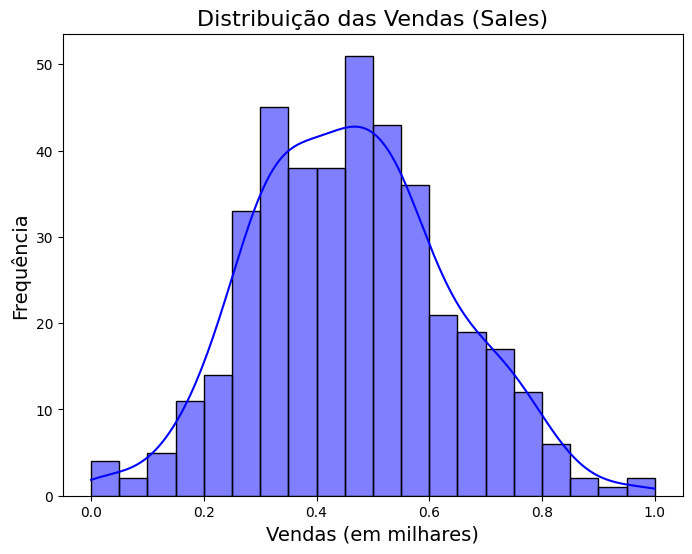

In [40]:
# visualizar os dados

plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True, bins=20, color='blue')
plt.title('Distribuição das Vendas (Sales)', fontsize=16)
plt.xlabel('Vendas (em milhares)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

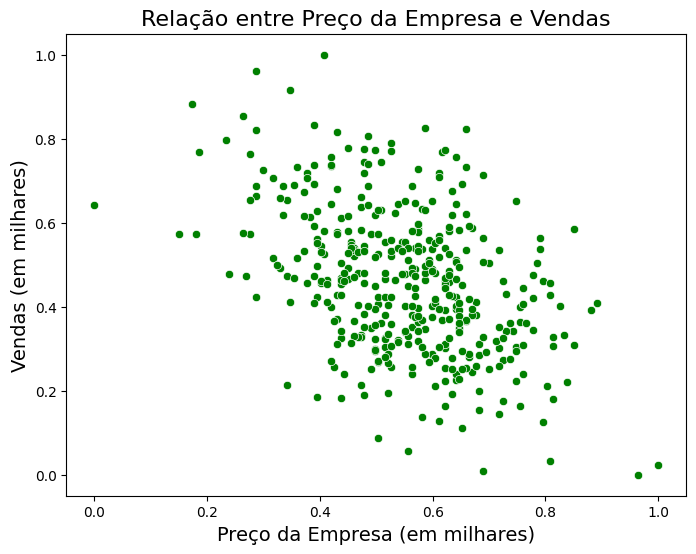

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Sales', data=df, color='green')
plt.title('Relação entre Preço da Empresa e Vendas', fontsize=16)
plt.xlabel('Preço da Empresa (em milhares)', fontsize=14)
plt.ylabel('Vendas (em milhares)', fontsize=14)
plt.show()

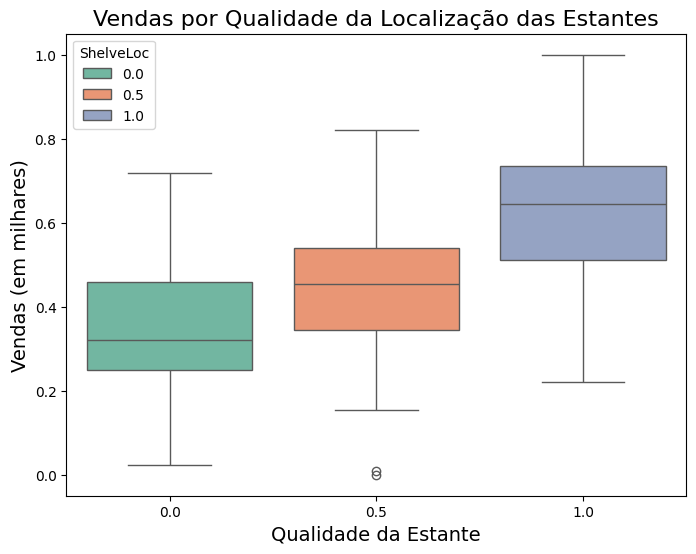

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ShelveLoc', y='Sales', data=df, hue='ShelveLoc', palette='Set2')
plt.title('Vendas por Qualidade da Localização das Estantes', fontsize=16)
plt.xlabel('Qualidade da Estante', fontsize=14)
plt.ylabel('Vendas (em milhares)', fontsize=14)
plt.show()

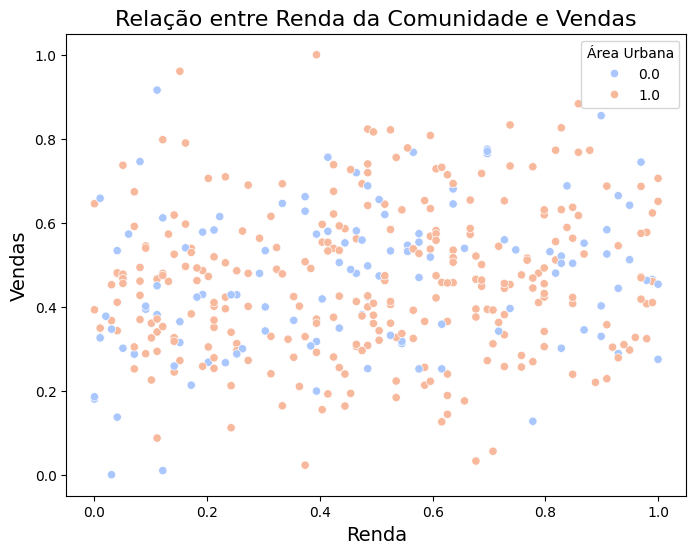

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Sales', data=df, hue='Urban', palette='coolwarm')
plt.title('Relação entre Renda da Comunidade e Vendas', fontsize=16)
plt.xlabel('Renda', fontsize=14)
plt.ylabel('Vendas', fontsize=14)
plt.legend(title='Área Urbana')
plt.show()

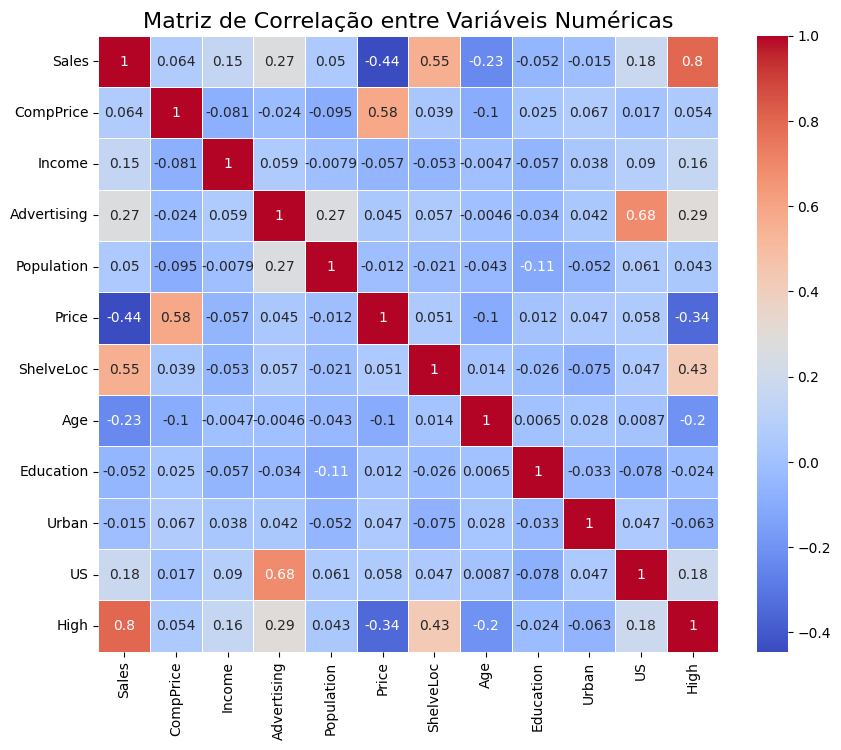

In [44]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

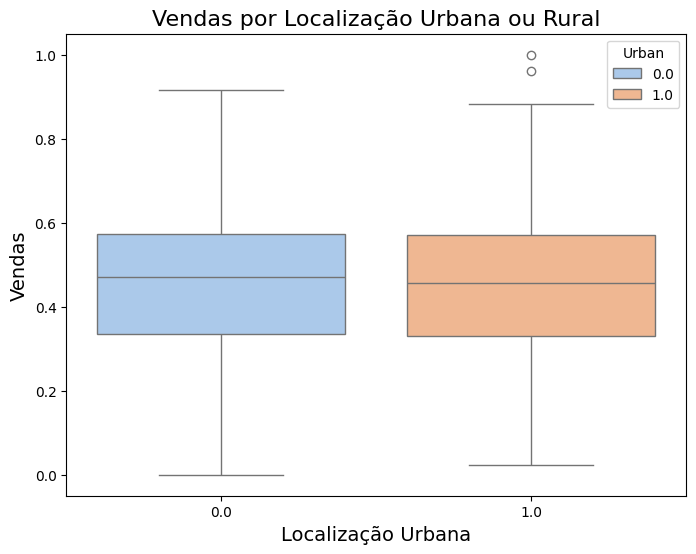

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Urban', y='Sales', data=df, hue='Urban', palette='pastel')
plt.title('Vendas por Localização Urbana ou Rural', fontsize=16)
plt.xlabel('Localização Urbana', fontsize=14)
plt.ylabel('Vendas', fontsize=14)
plt.show()

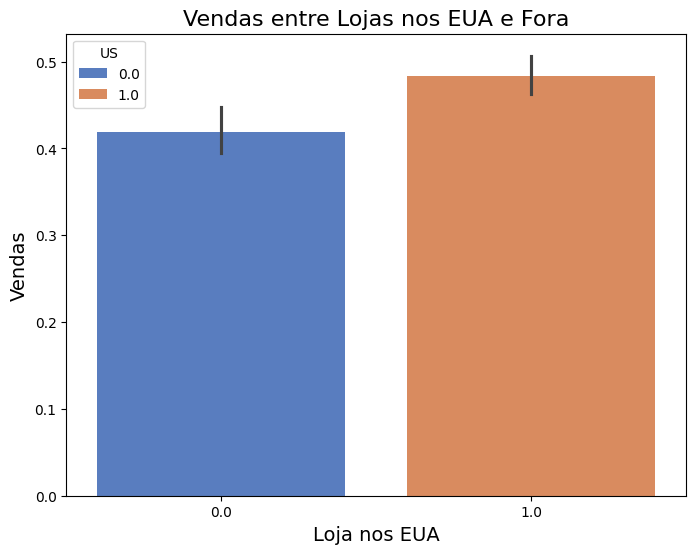

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x='US', y='Sales', data=df, hue='US', palette='muted')
plt.title('Vendas entre Lojas nos EUA e Fora', fontsize=16)
plt.xlabel('Loja nos EUA', fontsize=14)
plt.ylabel('Vendas', fontsize=14)
plt.show()

### Construa um modelo de Regressão Linear Múltipla.

Utilizando o modelo, faça a predição do atributo Sales no conjunto teste

Atenção: o atributo High deve ser eliminado para este processo

In [47]:
regressao_linear = LinearRegression()

regressao_linear.fit(X_train, y_train)
y_pred = regressao_linear.predict(X_test)

### Pós-processamento: Avalie cada modelo de regressão

Calcule as medidas de desempenho vistas em aula (erro quadrático médio, R2)

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance on the Test Set:")
print(f"MSE: {mse:.4%}")
print(f"R2 Score: {r2:.4%}")

Performance on the Test Set:
MSE: 0.4532%
R2 Score: 84.7939%


### Agora, construa um modelo de Regressão Logística

Faça a predição do atributo High no conjunto teste, e avalie utilizando métricas adequadas

Atenção: o atributo Sales deve ser eliminado para este processo

In [49]:
# Didivir dados de treino e teste

df_linear = df.drop('Sales', axis=1)

X = df_linear.drop('High', axis=1)
y = df_linear['High']

np.random.seed(456)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)


# Treinar o modelo de Regressão Logística

regressao_logistica = LogisticRegression()

regressao_logistica.fit(X_train, y_train)

# Fazer predições com o conjunto de teste

y_pred = regressao_logistica.predict(X_test)

y_prob = regressao_logistica.predict_proba(X_test)[:, 1]

# Calcular métricas de desempenho

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Performance on the Test Set:")
print(f"Test Accuracy: {accuracy:.4%}")
print(f"Test Precision: {precision:.4%}")
print(f"Test Recall: {recall:.4%}")
print(f"Test F1 Score: {f1:.4%}")
print(f"Test ROC AUC Score: {roc_auc:.4%}")

Performance on the Test Set:
Test Accuracy: 81.2500%
Test Precision: 80.7692%
Test Recall: 67.7419%
Test F1 Score: 73.6842%
Test ROC AUC Score: 88.9401%
